In [1]:
#basics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
#needs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("obesity.csv")

In [3]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [4]:
df.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,0.216485,0.003316,0.005211,0.748460,0.026528,0.460445
std,0.500083,6.345968,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.411946,0.057502,0.072015,0.434001,0.160737,0.498551
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,22.777890,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()
# all are numeric values, int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [6]:
df.isna().sum()
#no missing values

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

In [7]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [8]:
# data preprocessing

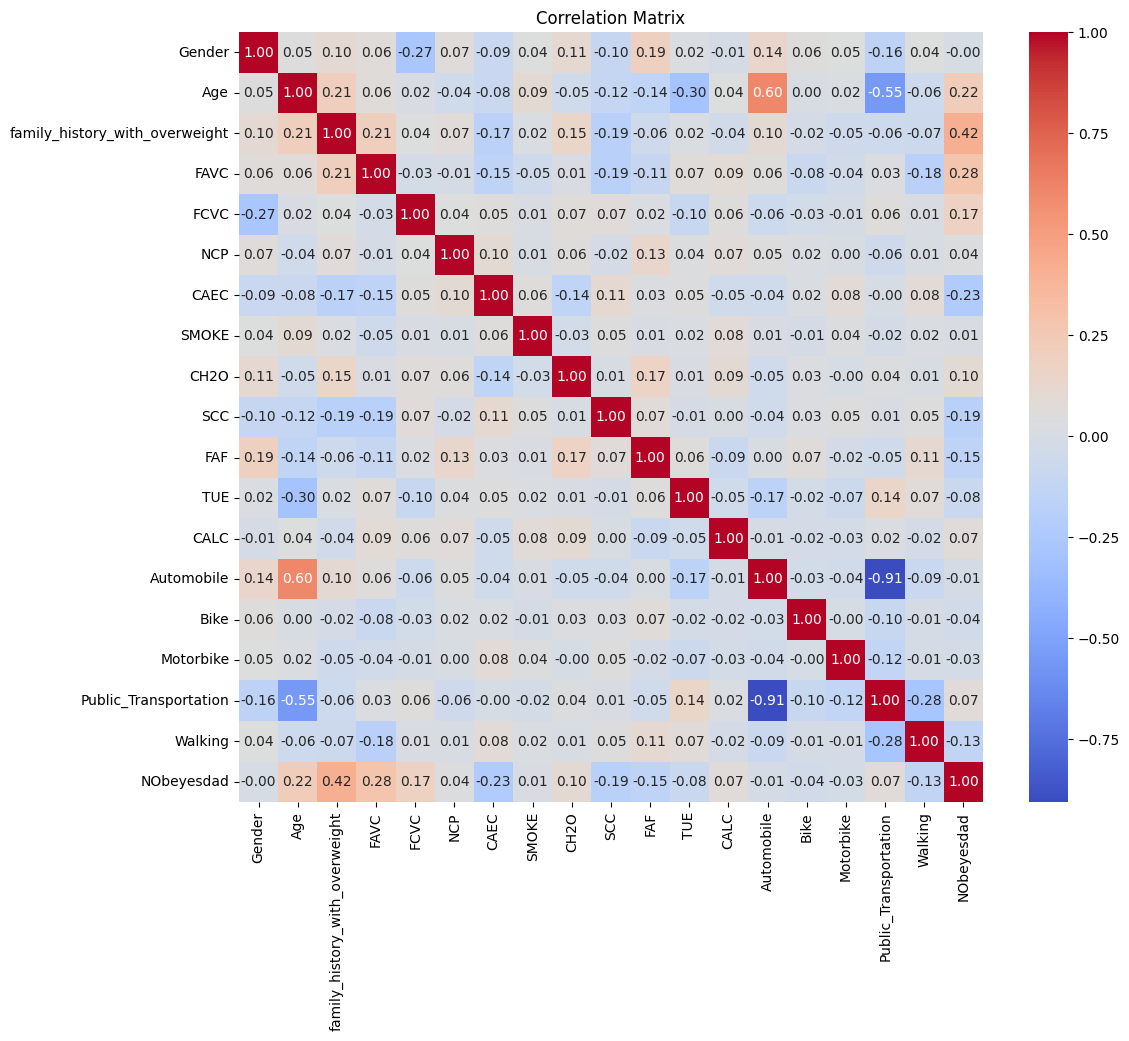

In [9]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

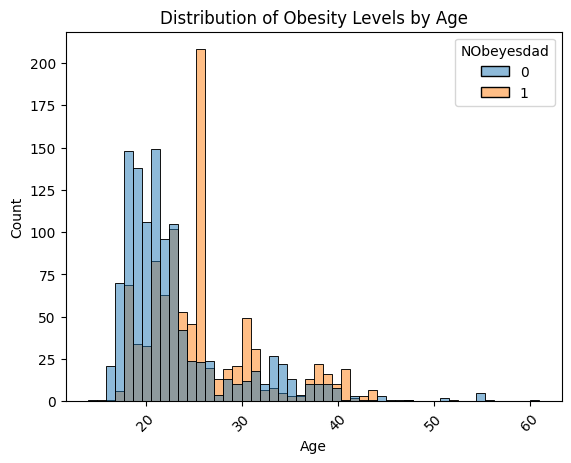

In [10]:
sns.histplot(data=df, x='Age', hue='NObeyesdad', alpha = 0.5)
plt.title('Distribution of Obesity Levels by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
df.groupby('family_history_with_overweight')['Age'].agg(['mean', 'median', 'count'])

,mean,median,count
family_history_with_overweight,,,
0,21.549015,20.0,385
1,24.929043,23.0,1726


In [12]:
df.groupby('NObeyesdad')['Age'].agg(['mean', 'median', 'count'])

,mean,median,count
NObeyesdad,,,
0,23.038007,21.000000,1139
1,25.806181,25.138276,972


In [13]:
print("Count with family history of overweight: ", df[(df['NObeyesdad'] == 1) & (df['family_history_with_overweight'] == 1)]['Age'].count())
print("Count without family history of overweight: ", df[(df['NObeyesdad'] == 1) & (df['family_history_with_overweight'] == 0)]['Age'].count())

Count with family history of overweight:  964
Count without family history of overweight:  8


In [14]:
df['Public_Transportation'].value_counts()

Public_Transportation
1    1580
0     531
Name: count, dtype: int64

In [15]:
df['Automobile'].value_counts()

Automobile
0    1654
1     457
Name: count, dtype: int64

In [17]:
#Predictor is Obesity, lthe last column
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [20]:
print(y)

[0 0 0 ... 1 1 1]


In [21]:
print(X)

[[ 0.       21.        1.       ...  0.        1.        0.      ]
 [ 0.       21.        1.       ...  0.        1.        0.      ]
 [ 1.       23.        1.       ...  0.        1.        0.      ]
 ...
 [ 0.       22.524036  1.       ...  0.        1.        0.      ]
 [ 0.       24.361936  1.       ...  0.        1.        0.      ]
 [ 0.       23.664709  1.       ...  0.        1.        0.      ]]


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
print(X_test)

[[-1.01311923 -0.62424632  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [-1.01311923  0.2395332   0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [ 0.98705066 -0.99595344  0.46961161 ... -0.07719764 -1.69456768
  -0.1729054 ]
 ...
 [ 0.98705066 -0.84151761  0.46961161 ... -0.07719764 -1.69456768
  -0.1729054 ]
 [ 0.98705066  0.70071519  0.46961161 ... -0.07719764 -1.69456768
  -0.1729054 ]
 [ 0.98705066 -0.8593009   0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]]


In [24]:
print(X_train)

[[-1.01311923 -0.53264595  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [-1.01311923 -0.54423543  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [-1.01311923 -0.23925802  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 ...
 [-1.01311923 -0.22534243  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [-1.01311923 -0.22377429  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]
 [ 0.98705066 -0.68708178  0.46961161 ... -0.07719764  0.59012101
  -0.1729054 ]]


In [50]:

# Random Forest Models
rf_model_1 = RandomForestClassifier(n_estimators=4, max_leaf_nodes=30, criterion = 'gini', random_state=42)
rf_model_1.fit(X_train, y_train)
y_pred_1 = rf_model_1.predict(X_test)

rf_model_2 = RandomForestClassifier(n_estimators=60, max_leaf_nodes=30, criterion = 'gini',random_state=42)
rf_model_2.fit(X_train, y_train)
y_pred_2 = rf_model_2.predict(X_test)

rf_model_3 = RandomForestClassifier(n_estimators=130, max_leaf_nodes=30, criterion = 'gini',random_state=42)
rf_model_3.fit(X_train, y_train)
y_pred_3 = rf_model_3.predict(X_test)


rf_model_4 = RandomForestClassifier(n_estimators=2000, max_leaf_nodes=30, criterion = 'gini',random_state=42)
rf_model_4.fit(X_train, y_train)
y_pred_4 = rf_model_4.predict(X_test)


In [51]:

# Performance Metrics
accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test, y_pred_2)
accuracy_3 = accuracy_score(y_test, y_pred_3)
accuracy_4 = accuracy_score(y_test, y_pred_4)

# Confusion Matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_3 = confusion_matrix(y_test, y_pred_3)
cm_4 = confusion_matrix(y_test, y_pred_4)


print(classification_report(y_test,y_pred_1))
print(classification_report(y_test,y_pred_2))
print(classification_report(y_test,y_pred_3))
print(classification_report(y_test,y_pred_4))



              precision    recall  f1-score   support

           0       0.88      0.88      0.88       224
           1       0.87      0.87      0.87       199

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.88       423
weighted avg       0.88      0.88      0.88       423

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       224
           1       0.88      0.88      0.88       199

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       224
           1       0.89      0.87      0.88       199

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423

              preci

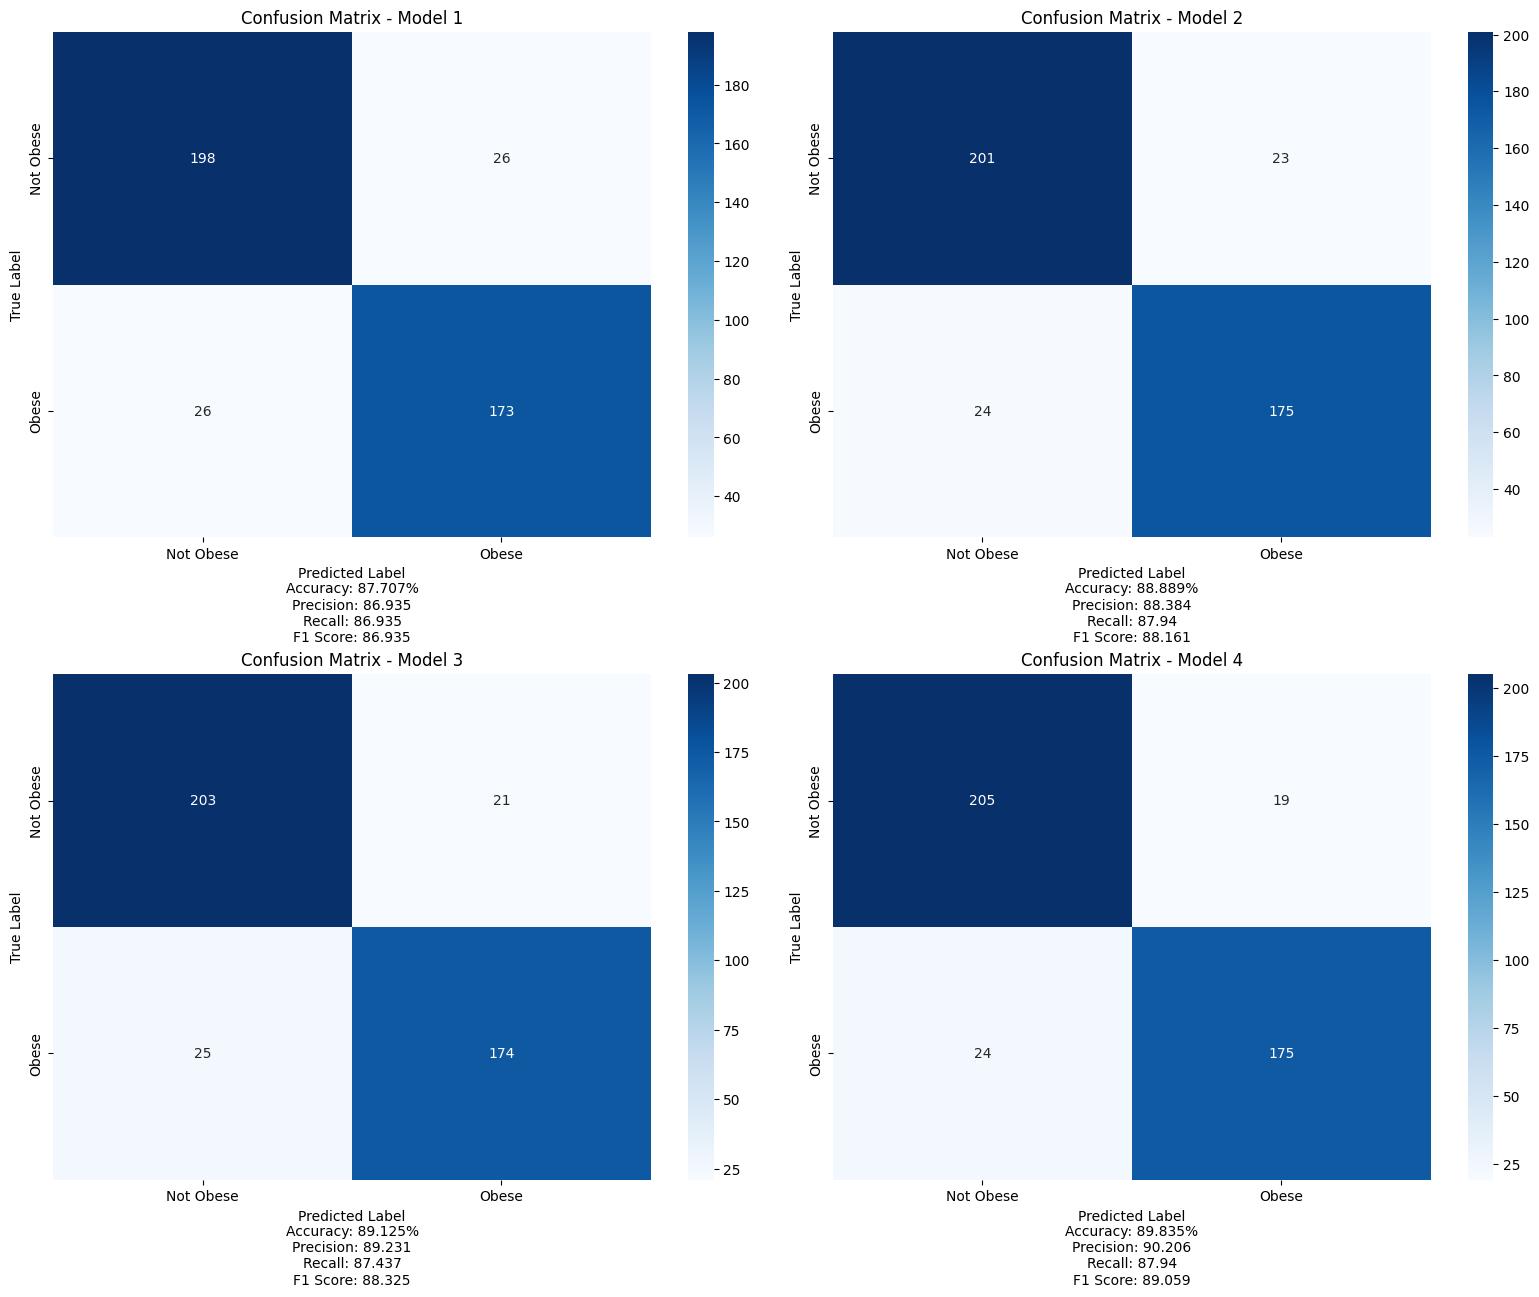

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 scores for each model
precision_1 = precision_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)

precision_2 = precision_score(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2)

precision_3 = precision_score(y_test, y_pred_3)
recall_3 = recall_score(y_test, y_pred_3)
f1_3 = f1_score(y_test, y_pred_3)

precision_4 = precision_score(y_test, y_pred_4)
recall_4 = recall_score(y_test, y_pred_4)
f1_4 = f1_score(y_test, y_pred_4)

# Visualizations
plt.figure(figsize=(16, 13))

# Confusion Matrix for Model 1
plt.subplot(2, 2, 1)
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Obese', 'Obese'], yticklabels=['Not Obese', 'Obese'])
plt.title('Confusion Matrix - Model 1')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.text(0.5, -0.15, f"Accuracy: {round(accuracy_1*100, 3)}%\nPrecision: {round(precision_1*100, 3)}\nRecall: {round(recall_1*100, 3)}\nF1 Score: {round(f1_1*100, 3)}", 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Confusion Matrix for Model 2
plt.subplot(2, 2, 2)
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Obese', 'Obese'], yticklabels=['Not Obese', 'Obese'])
plt.title('Confusion Matrix - Model 2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.text(0.5, -0.15, f"Accuracy: {round(accuracy_2*100, 3)}%\nPrecision: {round(precision_2*100, 3)}\nRecall: {round(recall_2*100, 3)}\nF1 Score: {round(f1_2*100, 3)}", 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Confusion Matrix for Model 3
plt.subplot(2, 2, 3)
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Obese', 'Obese'], yticklabels=['Not Obese', 'Obese'])
plt.title('Confusion Matrix - Model 3')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.text(0.5, -0.15, f"Accuracy: {round(accuracy_3*100, 3)}%\nPrecision: {round(precision_3*100, 3)}\nRecall: {round(recall_3*100, 3)}\nF1 Score: {round(f1_3*100, 3)}", 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Confusion Matrix for Model 4
plt.subplot(2, 2, 4)
sns.heatmap(cm_4, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Obese', 'Obese'], yticklabels=['Not Obese', 'Obese'])
plt.title('Confusion Matrix - Model 4')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.text(0.5, -0.15, f"Accuracy: {round(accuracy_4*100, 3)}%\nPrecision: {round(precision_4*100, 3)}\nRecall: {round(recall_4*100, 3)}\nF1 Score: {round(f1_4*100, 3)}", 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [2]:
#chekcing if it is overfitting
rf_model = RandomForestClassifier(n_estimators=130, max_leaf_nodes=30, criterion='gini', random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred, pos_label='Profit')
train_precision = precision_score(y_train, y_train_pred, pos_label='Profit')
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print initial model metrics
print("Initial Model Metrics:")
print(f"Training Accuracy: {train_accuracy*100}")
print(f"Testing Accuracy: {test_accuracy*100}")
print(f"Training Precision: {train_precision*100}")
print(f"Testing Precision: {test_precision*100}")
print(f"Training Recall: {train_recall*100}")
print(f"Testing Recall: {test_recall*100}")
print(f"Training F1 Score: {train_f1*100}")
print(f"Testing F1 Score: {test_f1*100}")

# Check for overfitting based on F1 scores
if train_f1 > test_f1:
    print("The initial model might be overfitting based on F1 score but the diffrence is too small.")
else:
    print("The initial model is not overfitting based on F1 score.")

NameError: name 'RandomForestClassifier' is not defined

In [29]:
# I picked the third model as it has better results
rf_model_regularized = RandomForestClassifier(n_estimators=130, max_leaf_nodes=30, criterion='gini', random_state=42, min_samples_split=5, min_samples_leaf=2)
rf_model_regularized.fit(X_train, y_train)
y_train_pred_reg = rf_model_regularized.predict(X_train)
y_test_pred_reg = rf_model_regularized.predict(X_test)
# Predictions on training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
train_precision_reg = precision_score(y_train, y_train_pred_reg)
test_precision_reg = precision_score(y_test, y_test_pred_reg)
train_recall_reg = recall_score(y_train, y_train_pred_reg)
test_recall_reg = recall_score(y_test, y_test_pred_reg)
train_f1_reg = f1_score(y_train, y_train_pred_reg)
test_f1_reg = f1_score(y_test, y_test_pred_reg)

# Print regularized model metrics
print("Regularized Model Metrics:")
print(f"Regularized Training Precision: {train_precision_reg*100}")
print(f"Regularized Testing Precision: {test_precision_reg*100}")
print(f"Regularized Training Recall: {train_recall_reg*100}")
print(f"Regularized Testing Recall: {test_recall_reg*100}")
print(f"Regularized Training F1 Score: {train_f1_reg*100}")
print(f"Regularized Testing F1 Score: {test_f1_reg*100}")

# Check if regularization helped reduce overfitting based on F1 scores
if train_f1_reg > test_f1_reg:
    print("Regularization did not effectively mitigate overfitting based on F1 score.")
else:
    print("Regularization helped mitigate overfitting based on F1 score.")

Regularized Model Metrics:
Regularized Training Precision: 92.5392670157068
Regularized Testing Precision: 88.88888888888889
Regularized Training Recall: 91.46183699870633
Regularized Testing Recall: 88.44221105527639
Regularized Training F1 Score: 91.99739752765127
Regularized Testing F1 Score: 88.66498740554157
Regularization did not effectively mitigate overfitting based on F1 score.


In [30]:
# it performs well with 30 leafs than with 16 and the number of estimator is best with 110-140

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

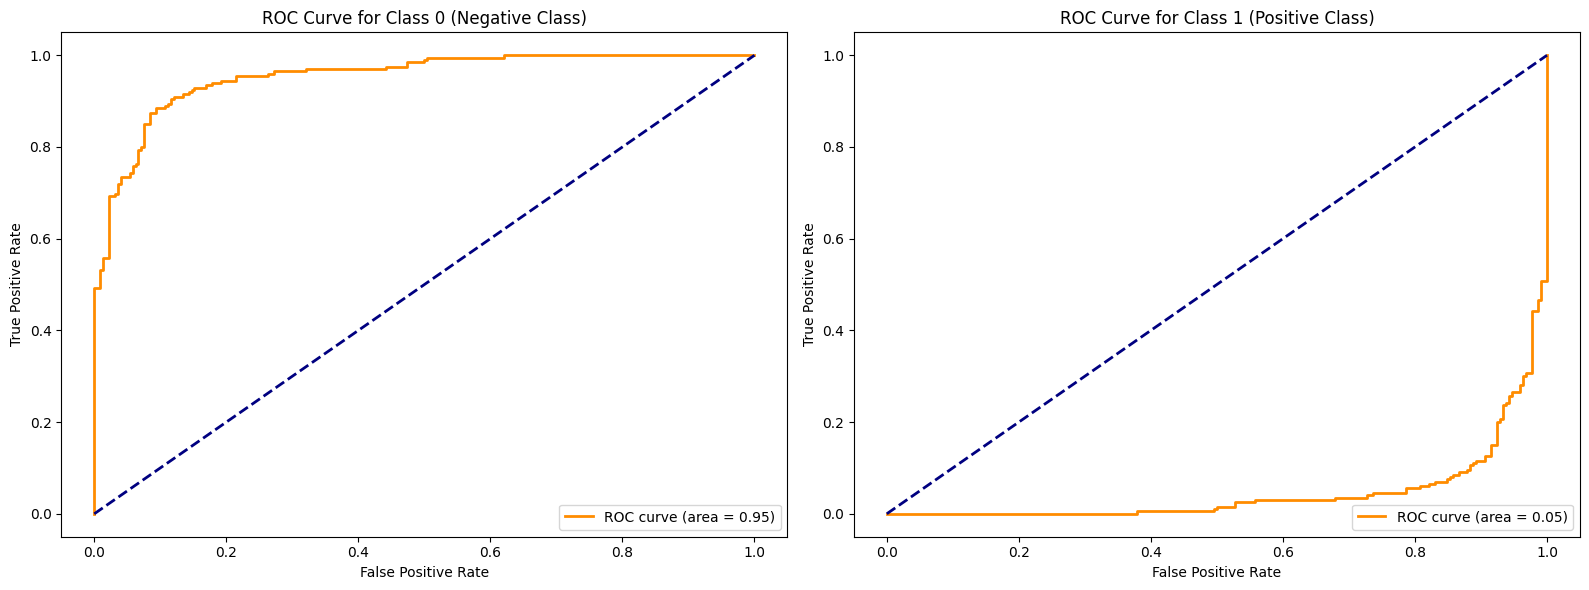

In [32]:
y_prob_0 = rf_model_3.predict_proba(X_test)[:, 1]  # Probability of class 0
y_prob_1 = rf_model_3.predict_proba(X_test)[:, 0]  # Probability of class 1

# ROC curve for class 0
fpr_0, tpr_0, thresholds_0 = roc_curve(y_test, y_prob_0)
roc_auc_0 = auc(fpr_0, tpr_0)

# ROC curve for class 1
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_prob_1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot both ROC curves side by side
plt.figure(figsize=(16, 6))

# ROC curve for class 0
plt.subplot(1, 2, 1)
plt.plot(fpr_0, tpr_0, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_0:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 0 (Negative Class)')
plt.legend(loc='lower right')

# ROC curve for class 1
plt.subplot(1, 2, 2)
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_1:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 1 (Positive Class)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [33]:
# it shows prediction acucracy, if there are the same number it means its predicted correct
y_pred_3 = rf_model_3.predict(X_test)
print(np.concatenate((y_pred_3.reshape(len(y_pred_3),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]

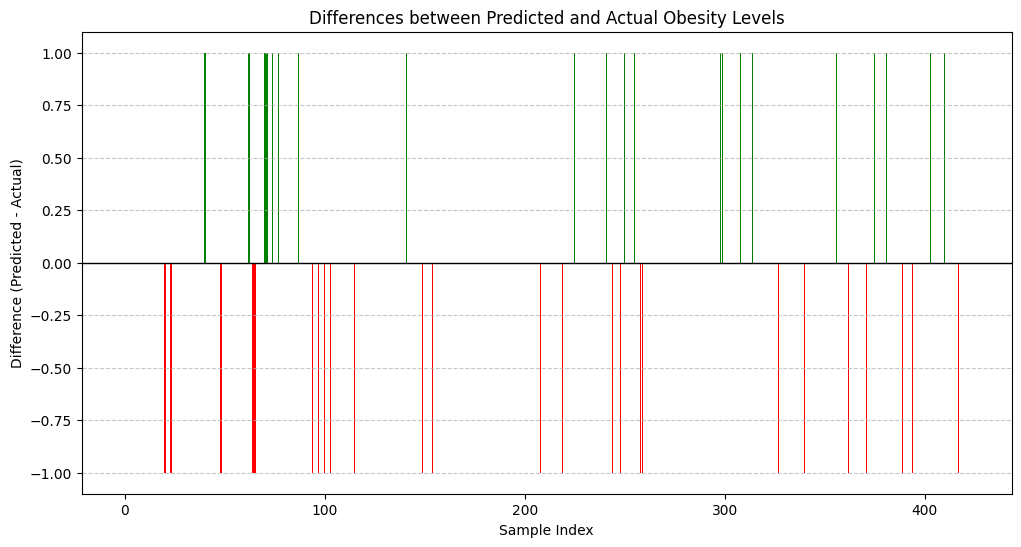

In [34]:
differences = y_pred_3 - y_test

# The x index indicates the position of the sample test set.
# The y  represents the difference between the predicted obesity level and the actual 
# obesity level for each sample. 
# A positive value indicates that the model overestimated the obesity level,
# while a negative value indicates that the model underestimated the obesity level.
plt.figure(figsize=(12, 6))
plt.bar(range(len(differences)), differences, color=['green' if x >= 0 else 'red' for x in differences])
plt.xlabel('Sample Index')
plt.ylabel('Difference (Predicted - Actual)')
plt.title('Differences between Predicted and Actual Obesity Levels')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linewidth=1)
plt.show()

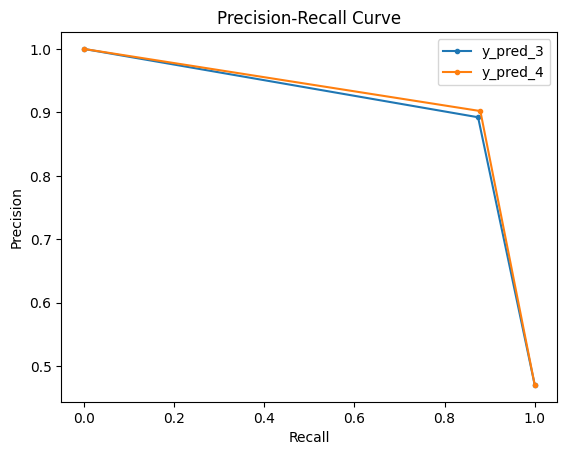

In [35]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, y_pred_3) 
  

precision_3, recall_3, threshold_3 = precision_recall_curve(y_test, y_pred_3)

# Compute precision, recall, and thresholds for y_pred_4
precision_4, recall_4, threshold_4 = precision_recall_curve(y_test, y_pred_4)

# Plot Precision-Recall curves for both y_pred_3 and y_pred_4
plt.plot(recall_3, precision_3, marker='.', label='y_pred_3')
plt.plot(recall_4, precision_4, marker='.', label='y_pred_4')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [36]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score
cv_scores1 = cross_val_score(rf_model_1, X_train, y_train, cv=5, scoring='f1')
print("Cross-validation scores:", cv_scores1)
print("Mean CV score:", cv_scores1.mean())
print("Standard deviation of CV scores:", cv_scores1.std())
print("")
cv_scores2 = cross_val_score(rf_model_2, X_train, y_train, cv=5, scoring='f1')
print("Cross-validation scores:", cv_scores2)
print("Mean CV score:", cv_scores2.mean())
print("Standard deviation of CV scores:", cv_scores2.std())
print("")

cv_scores3 = cross_val_score(rf_model_3, X_train, y_train, cv=5, scoring='f1')
print("Cross-validation scores:", cv_scores3)
print("Mean CV score:", cv_scores3.mean())
print("Standard deviation of CV scores:", cv_scores3.std())
print("")

cv_scores4 = cross_val_score(rf_model_4, X_train, y_train, cv=5, scoring='f1')
print("Cross-validation scores:", cv_scores4)
print("Mean CV score:", cv_scores4.mean())
print("Standard deviation of CV scores:", cv_scores4.std())


Cross-validation scores: [0.87581699 0.83056478 0.81533101 0.8089172  0.78929766]
Mean CV score: 0.8239855288570551
Standard deviation of CV scores: 0.029103233315586514

Cross-validation scores: [0.9015873  0.87378641 0.83848797 0.86349206 0.85530547]
Mean CV score: 0.8665318423185777
Standard deviation of CV scores: 0.02099163811389633

Cross-validation scores: [0.90734824 0.87333333 0.83959044 0.86708861 0.86538462]
Mean CV score: 0.8705490485620789
Standard deviation of CV scores: 0.021721022888890374

Cross-validation scores: [0.91025641 0.87043189 0.83561644 0.87179487 0.87261146]
Mean CV score: 0.8721422158126613
Standard deviation of CV scores: 0.023622405810184405


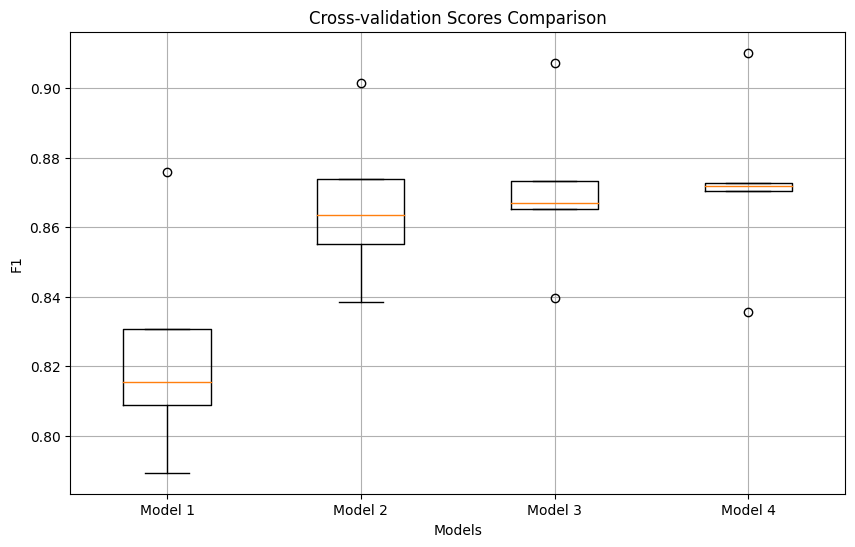

In [37]:
import matplotlib.pyplot as plt

# Define the labels for the models
model_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Combine the cross-validation scores of both models for visualization
all_cv_scores = [cv_scores1, cv_scores2, cv_scores3, cv_scores4]

# Plot the cross-validation scores for each model
plt.figure(figsize=(10, 6))
plt.boxplot(all_cv_scores, labels=model_labels)
plt.title('Cross-validation Scores Comparison')
plt.xlabel('Models')
plt.ylabel('F1')
plt.grid(True)
plt.show()

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=130,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

#OOB score is a performance metric which is quite high in this case


0.9348341232227488

In [39]:
from sklearn.ensemble import RandomForestClassifier
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

rnd_clf = RandomForestClassifier(n_estimators=130, max_leaf_nodes=30,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)



for score, name in zip(rnd_clf.feature_importances_, X.columns):
    print(round(score, 2), name)

    # impacts on the model for each feature

0.02 Gender
0.16 Age
0.19 family_history_with_overweight
0.05 FAVC
0.1 FCVC
0.1 NCP
0.1 CAEC
0.0 SMOKE
0.06 CH2O
0.01 SCC
0.07 FAF
0.08 TUE
0.03 CALC
0.01 Automobile
0.0 Bike
0.0 Motorbike
0.02 Public_Transportation
0.0 Walking


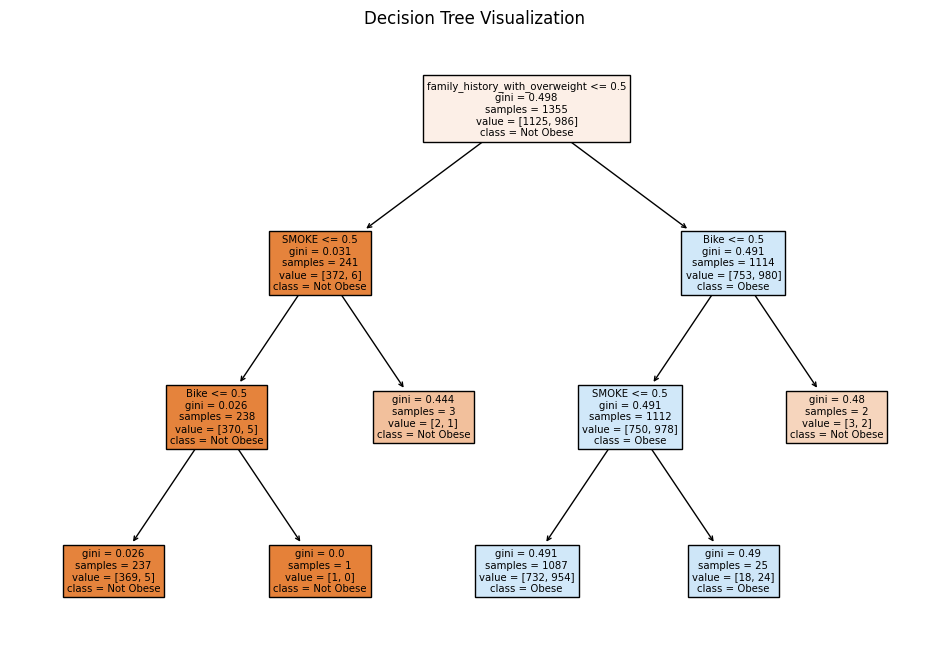

In [40]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# selected features to visualize a tree leaf
selected_features = ['family_history_with_overweight', 'SMOKE', 'Bike']  

X_subset = df[selected_features]
y = df['NObeyesdad']

# Creating and fiting in the RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=130, random_state=42)
rnd_clf.fit(X_subset, y)

plt.figure(figsize=(12, 8))
plot_tree(rnd_clf.estimators_[0], feature_names=X_subset.columns.tolist(), class_names=["Not Obese", "Obese"], filled=True)
plt.title('Decision Tree Visualization')
plt.savefig('leaf.png')
plt.show()

In [79]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [80]:
df.describe()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,0.216485,0.003316,0.005211,0.748460,0.026528,0.460445
std,0.500083,6.345968,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.411946,0.057502,0.072015,0.434001,0.160737,0.498551
min,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,22.777890,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,26.000000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,61.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['NObeyesdad'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [42]:

# Using the elbow method to find the optimal number of clusters (k). not the optimal way to fink K
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

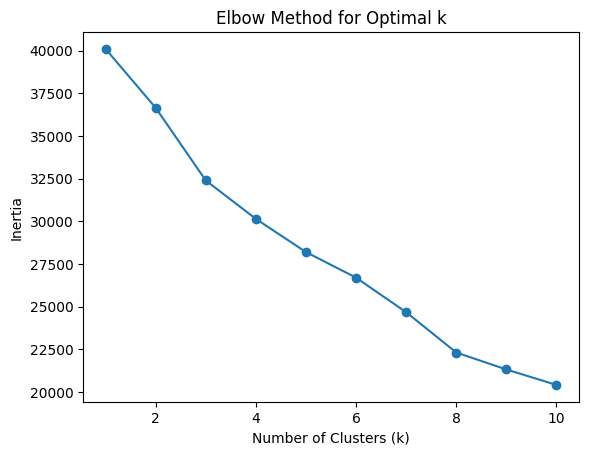

In [43]:
# elbow method doesnt neccaserily mean that it will be correctly identifying the correct number of k

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

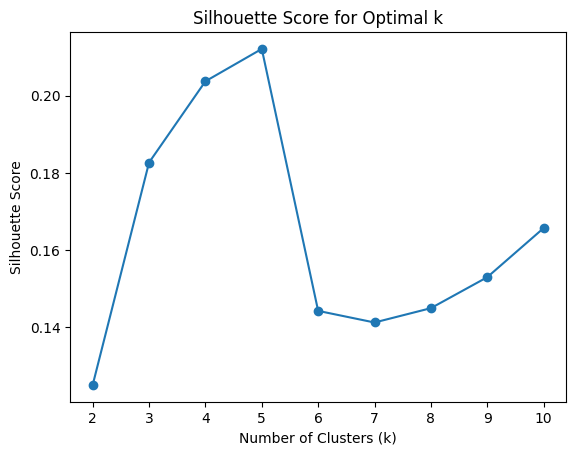

In [44]:
#higher the score the better, it means it is more likly ot have clusters when the score is highest
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


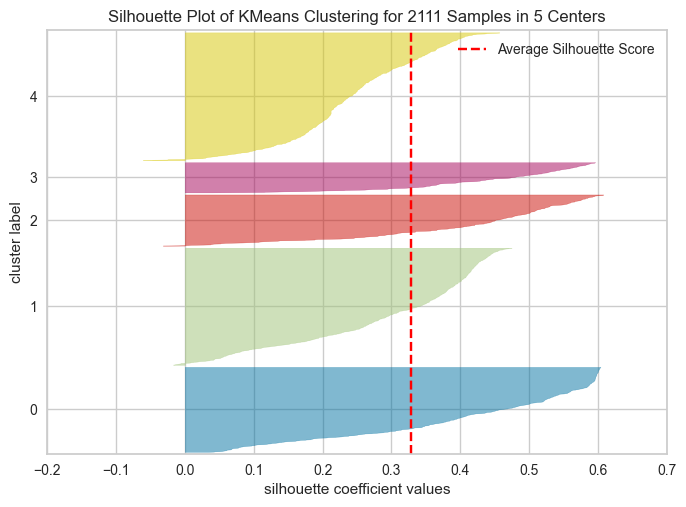

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2111 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# taking these features from df

X = df.drop(columns=['NObeyesdad'])
# defining the KMeans clustering model and the SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)
visualizer.show()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


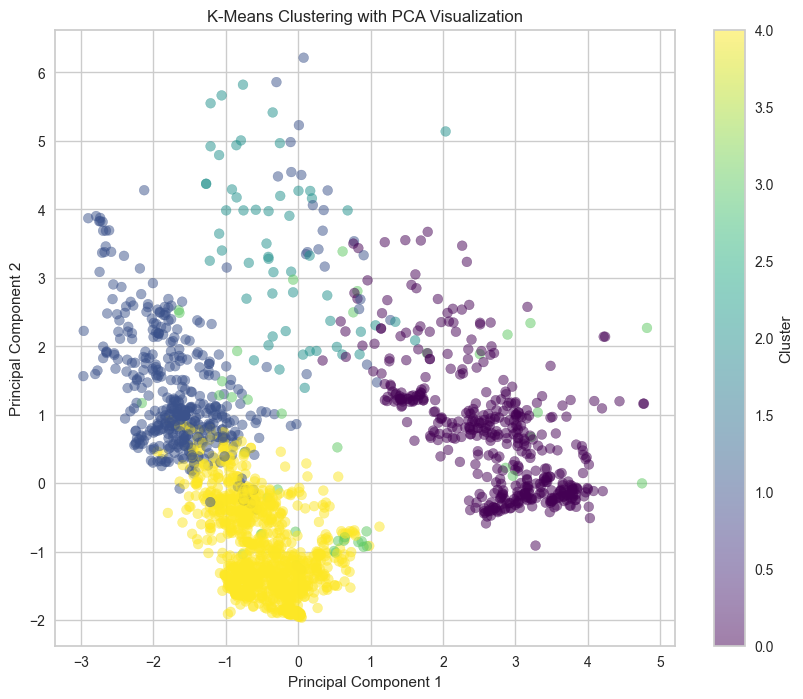

In [46]:
# Based on the elbow plot, it suggests k=5 as a good choice
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality of the scaled data
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
scaled_data_pca = pca.fit_transform(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(scaled_data_pca[:, 0], scaled_data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('K-Means Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


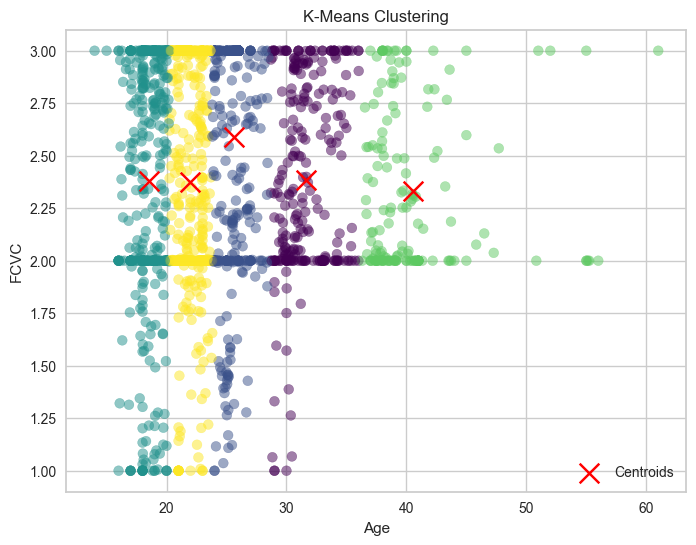

In [47]:
X = df[['Age', 'FCVC']].values

# Perform k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('FCVC')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from sklearn.cluster import KMeans

# Assuming X contains the features for clustering and y is the target - NObeyesdad
X = df.drop(columns=['NObeyesdad'])
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

cluster_df = pd.DataFrame({'Cluster': clusters, 'NObeyesdad': df['NObeyesdad']})

# Calculating the distribution of 'NObeyesdad' within each cluster
cluster_distribution = cluster_df.groupby('Cluster')['NObeyesdad'].value_counts(normalize=True)
cluster_distribution


C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster  NObeyesdad
0        1             0.754587
         0             0.245413
1        0             0.783694
         1             0.216306
2        1             0.524715
         0             0.475285
3        1             0.612903
         0             0.387097
4        0             0.573171
         1             0.426829
Name: proportion, dtype: float64

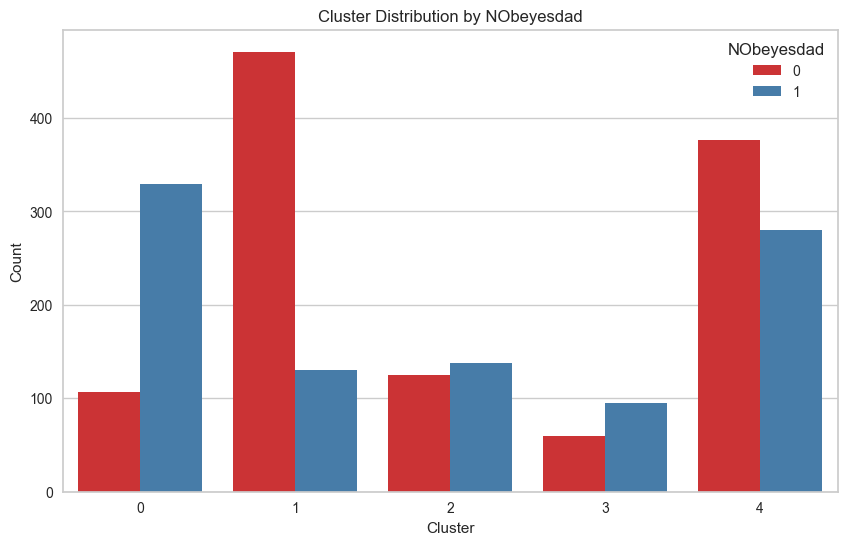

In [49]:
# shows the distribution of obesity in clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=cluster_df, x='Cluster', hue='NObeyesdad', palette='Set1')
plt.title('Cluster Distribution by NObeyesdad')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='NObeyesdad', loc='upper right')
plt.show()